In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# **Helper file**

In [ ]:
import os
import glob
import random
from math import sqrt
import numpy as np
from PIL import Image


class UCMayo4Dataset:
    """Ulcerative Colitis dataset grouped according to the Endoscopic Mayo scoring system"""

    def __init__(self, root_dir, val_split=0.2, random_seed=42, subset='train'):
        """
        root_dir (string): Path to the parent folder where class folders are located.
        val_split (float): Proportion of the dataset used for validation (default is 0.2).
        random_seed (int): Random seed to ensure reproducibility of splits.
        subset (str): Which subset to return: 'train' or 'val'.
        """
        self.class_names = []
        self.samples = []
        self.subset = subset

        # Set the random seed for reproducibility
        random.seed(random_seed)

        # Collect subfolders containing the classes
        sub_folders = glob.glob(os.path.join(root_dir, "*"))
        sub_folders.sort()

        # Extract class names and populate the samples list
        for folder in sub_folders:
            class_name = os.path.basename(folder)
            self.class_names.append(class_name)

            image_paths = glob.glob(os.path.join(folder, "*"))
            for image_path in image_paths:
                self.samples.append((image_path, self.class_names.index(class_name)))

        # Shuffle the samples and split them into training and validation sets
        random.shuffle(self.samples)
        val_size = int(len(self.samples) * val_split)
        if subset == 'train':
            self.indices = self.samples[val_size:]
        else:
            self.indices = self.samples[:val_size]

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        image_path, class_idx = self.indices[idx]
        image = Image.open(image_path).copy()
        return image, class_idx


import matplotlib.pyplot as plt
import numpy as np

# Function to calculate mean and standard deviation
def get_dataset_mean_and_std(dataset_dir):
    training_set = UCMayo4Dataset(dataset_dir)
    r_total = g_total = b_total = 0
    total_count = 0

    for image, _ in training_set:
        image = np.asarray(image)
        total_count += image.shape[0] * image.shape[1]

        r_total += np.sum(image[:, :, 0])
        g_total += np.sum(image[:, :, 1])
        b_total += np.sum(image[:, :, 2])

    r_mean = r_total / total_count
    g_mean = g_total / total_count
    b_mean = b_total / total_count

    r_total = g_total = b_total = 0

    for image, _ in training_set:
        image = np.asarray(image)
        total_count = image.shape[0] * image.shape[1]

        r_total += np.sum((image[:, :, 0] - r_mean) ** 2)
        g_total += np.sum((image[:, :, 1] - g_mean) ** 2)
        b_total += np.sum((image[:, :, 2] - b_mean) ** 2)

    r_std = sqrt(r_total / total_count)
    g_std = sqrt(g_total / total_count)
    b_std = sqrt(b_total / total_count)

    return [r_mean / 255, g_mean / 255, b_mean / 255], [r_std / 255, g_std / 255, b_std / 255]




# **EDA**


---

For EDA, number of class images per category is calculated and channel based mean and standard deviation is calculated and their histogram plots are draw.

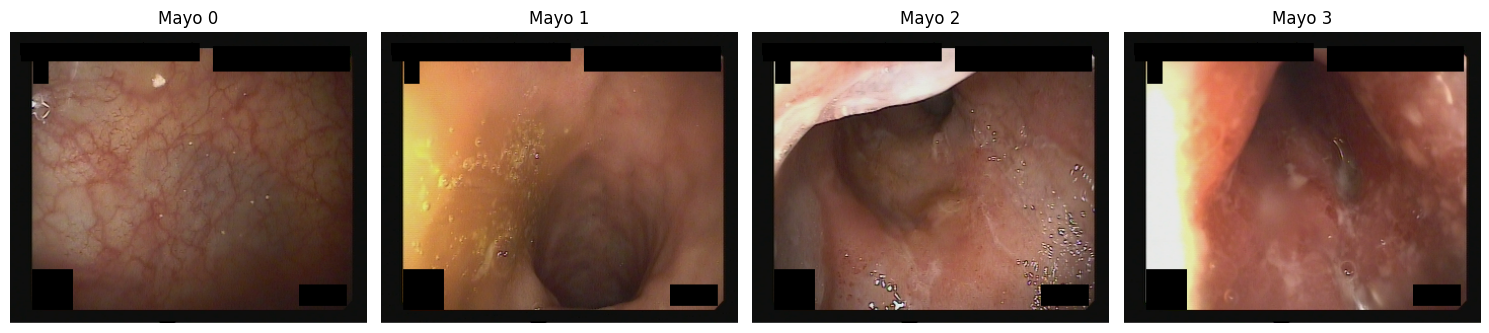


Number of images per category:
Mayo 0: 5180
Mayo 1: 2588
Mayo 2: 1077
Mayo 3: 745


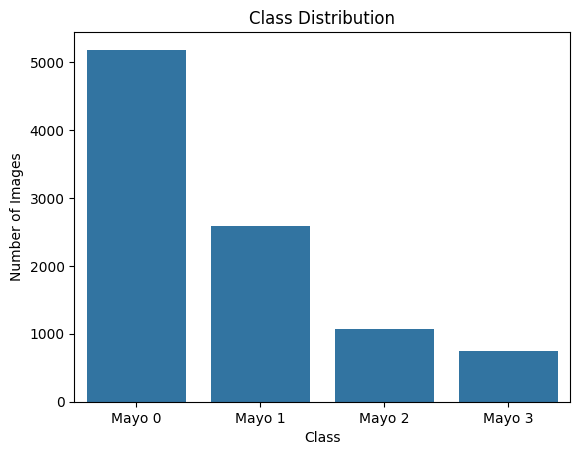

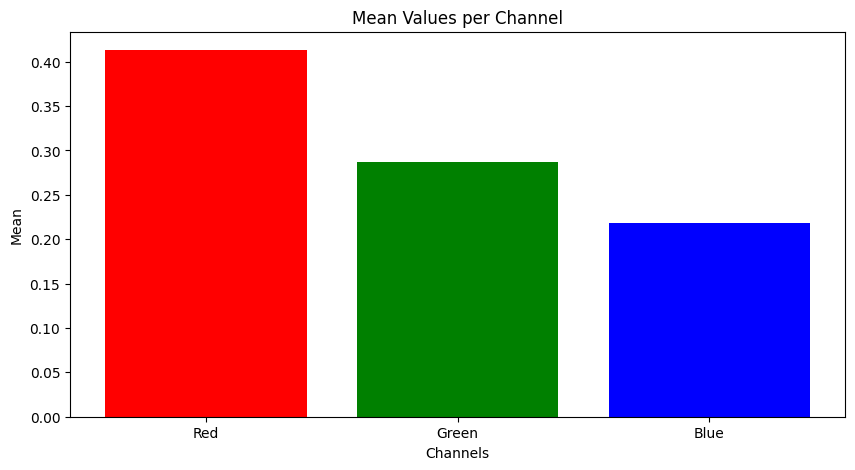

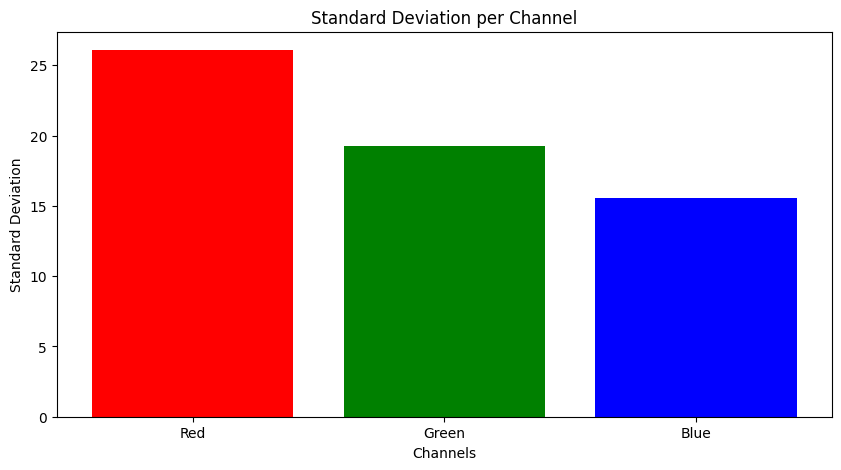

In [3]:
import matplotlib.pyplot as plt
import random
import os
import seaborn as sns
from PIL import Image
import numpy as np

# Define paths
dataset_dir = '/content/gdrive/MyDrive/data/train_and_validation_sets'
class_dirs = ['Mayo 0', 'Mayo 1', 'Mayo 2', 'Mayo 3']

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, class_dir in enumerate(class_dirs):
    class_path = os.path.join(dataset_dir, class_dir)
    images = os.listdir(class_path)

    image_name = random.choice(images)
    image_path = os.path.join(class_path, image_name)

    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_dir)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

class_image_count = {}

for class_dir in class_dirs:
    class_path = os.path.join(dataset_dir, class_dir)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    class_image_count[class_dir] = len(image_files)

print('\nNumber of images per category:')
for class_dir in class_dirs:
    print(f'{class_dir}: {class_image_count[class_dir]}')

sns.barplot(x=list(class_image_count.keys()), y=list(class_image_count.values()))
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

means, stds = get_dataset_mean_and_std(dataset_dir)

labels = ['Red', 'Green', 'Blue']
x = np.arange(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, means, color=['red', 'green', 'blue'])
plt.xticks(x, labels)
plt.xlabel('Channels')
plt.ylabel('Mean')
plt.title('Mean Values per Channel')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(x, stds, color=['red', 'green', 'blue'])
plt.xticks(x, labels)
plt.xlabel('Channels')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation per Channel')
plt.show()


In [4]:
print(means)

[0.41312135083912765, 0.28673049740617257, 0.21775811802042505]
